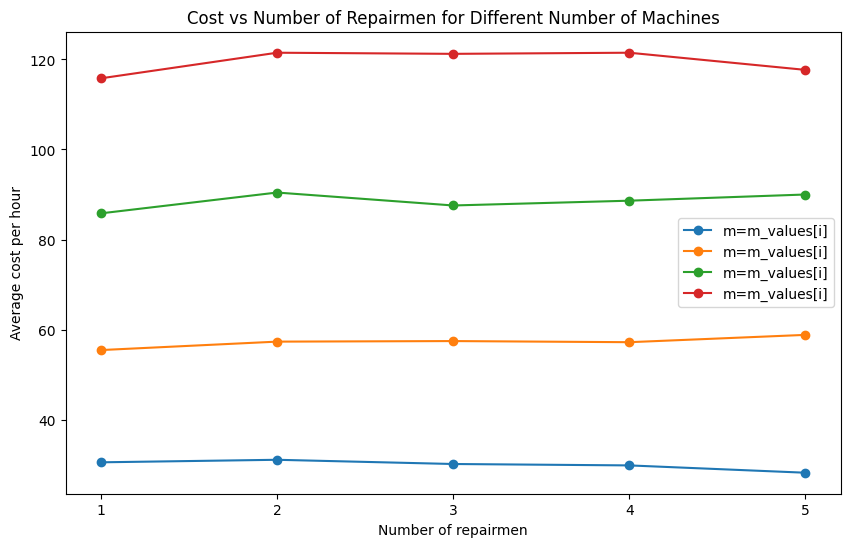

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_random_variable(mean):
    return np.random.exponential(mean)

def simulate_system(m, s, hours):
    machine_working_times = [exponential_random_variable(8) for _ in range(m)]
    machine_breakdown_times = [0] * m
    repairman_busy_until = [0] * s
    total_cost = 0

    for hour in range(hours):
        for i in range(m):
            if hour >= machine_breakdown_times[i]:
                machine_working_times[i] = exponential_random_variable(8)
                machine_breakdown_times[i] = hour + machine_working_times[i]
                total_cost += 50

        for j in range(s):
            if hour >= repairman_busy_until[j]:
                if any(t <= hour for t in machine_breakdown_times):
                    machine_to_repair = min([t for t in machine_breakdown_times if t > hour])
                    machine_index = machine_breakdown_times.index(machine_to_repair)
                    repair_time = exponential_random_variable(2)
                    repairman_busy_until[j] = hour + repair_time
                    machine_breakdown_times[machine_index] = float('inf')
                    total_cost += 10

    return total_cost / hours

m_values = [5, 10, 15, 20]
s_values = [1, 2, 3, 4, 5]
costs = []

for m in m_values:
    cost_per_s = []
    for s in s_values:
        cost_per_s.append(simulate_system(m, s, 800))
    costs.append(cost_per_s)

plt.figure(figsize=(10, 6))
for i in range(len(m_values)):
    plt.plot(s_values, costs[i], marker='o', label=f'm=m_values[i]')
plt.xlabel('Number of repairmen')
plt.ylabel('Average cost per hour')
plt.title('Cost vs Number of Repairmen for Different Number of Machines')
plt.xticks(s_values)
plt.legend()
plt.show()

In [1]:
import numpy as np

def exponential_distribution(mean, size):
    return np.random.exponential(mean, size)

def simulate_system(m, s, hours):
    machine_working_time = exponential_distribution(8, m)
    machine_breakdown_time = np.zeros(m)
    total_cost = 0

    for hour in range(hours):
        for i in range(m):
            if machine_breakdown_time[i] == 0:
                machine_working_time[i] -= 1
                if machine_working_time[i] <= 0:
                    machine_breakdown_time[i] = exponential_distribution(8, 1)
            else:
                machine_breakdown_time[i] -= 1
                if machine_breakdown_time[i] <= 0:
                    machine_breakdown_time[i] = 0
                    machine_working_time[i] = exponential_distribution(8, 1)
                    total_cost += 50

        repair_queue = 0
        for i in range(m):
            if machine_breakdown_time[i] > 0:
                repair_queue += 1

        while repair_queue > 0:
            repair_time = exponential_distribution(2, 1)
            total_cost += s * 10
            repair_queue -= s
            if repair_queue < 0:
                total_cost -= (abs(repair_queue) * 10)

    return total_cost / hours

m_values = range(5, 21, 1)
s_values = range (1, 6, 1)

for m in m_values:
    for s in s_values:
        avg_cost = simulate_system(m, s, 800)
        print(f"Для кол-ва станков в системе m = {m} и кол-ва ремонтников s = {s}, ожидаемая средняя затрата в час: {avg_cost}")

/tmp/ipykernel_70021/2694895731.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  machine_breakdown_time[i] = exponential_distribution(8, 1)
/tmp/ipykernel_70021/2694895731.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  machine_working_time[i] = exponential_distribution(8, 1)


Для кол-ва станков в системе m = 5 и кол-ва ремонтников s = 1, ожидаемая средняя затрата в час: 38.25
Для кол-ва станков в системе m = 5 и кол-ва ремонтников s = 2, ожидаемая средняя затрата в час: 36.15
Для кол-ва станков в системе m = 5 и кол-ва ремонтников s = 3, ожидаемая средняя затрата в час: 39.3125
Для кол-ва станков в системе m = 5 и кол-ва ремонтников s = 4, ожидаемая средняя затрата в час: 39.25
Для кол-ва станков в системе m = 5 и кол-ва ремонтников s = 5, ожидаемая средняя затрата в час: 40.4375
Для кол-ва станков в системе m = 6 и кол-ва ремонтников s = 1, ожидаемая средняя затрата в час: 46.8125
Для кол-ва станков в системе m = 6 и кол-ва ремонтников s = 2, ожидаемая средняя затрата в час: 46.975
Для кол-ва станков в системе m = 6 и кол-ва ремонтников s = 3, ожидаемая средняя затрата в час: 48.6125
Для кол-ва станков в системе m = 6 и кол-ва ремонтников s = 4, ожидаемая средняя затрата в час: 47.075
Для кол-ва станков в системе m = 6 и кол-ва ремонтников s = 5, ожидаемая